In [2]:
import sounddevice as sd
import acoular
import pylab as plt

# from os import path
# import pylab as plt
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

Fs = 44100
uma16dev = sd.query_devices("micArray16")
sd.default.samplerate = Fs
sd.default.channels = 16
sd.default.device = uma16dev['index']

blocksize = 128
npt = blocksize * 256
dur = npt/Fs

# Process audio data, read and then into FFT
# ts = acoular.TimeSamples( name = 'three_sources.h5' )
ts = acoular.SoundDeviceSamplesGenerator(device = uma16dev['index'], numchannels=16, numsamples=npt)
ps = acoular.PowerSpectra ( time_data=ts, block_size=blocksize, window='Rectangular' )

# Create the scene: a grid to work on and mic positions
rg = acoular.RectGrid( x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment = 0.01 )
micgeofile = 'uma16array.xml'
print(f"Using microphone file {micgeofile}")
mg = acoular.MicGeom( from_file=micgeofile )

# Prepare Beamformer
st = acoular.SteeringVector( grid=rg, mics=mg )
bb = acoular.BeamformerBase( freq_data=ps, steer=st )
print("Ready")

Using microphone file uma16array.xml
Ready


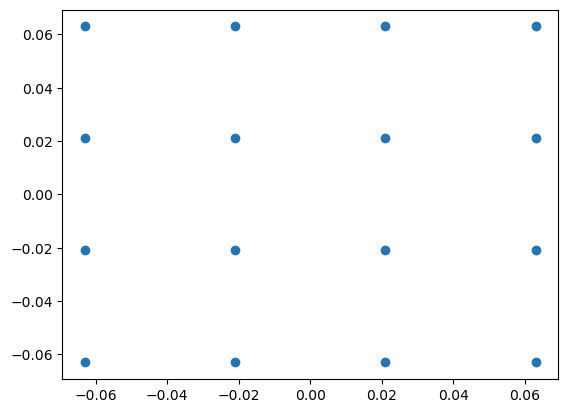

In [3]:
# Check: Plot microphone layout
plt.ion()
plt.plot(mg.mpos[0], mg.mpos[1], 'o')

In [4]:
# Check: Test read from TimeSamples device with n-blocks
def test_read():
    # ts.numsamples = 1024
    i = 0
    b = 0
    for smp in ts.result(128):
        i+=len(smp)
        b += 1
        # print(smp)
    print("Testread done, %i rows in %i blocks" % (i, b))
test_read()

{'name': 'nanoSHARC micArray16 UAC2.0: USB Audio (hw:2,0)', 'index': 0, 'hostapi': 0, 'max_input_channels': 16, 'max_output_channels': 0, 'default_low_input_latency': 0.008684807256235827, 'default_low_output_latency': -1.0, 'default_high_input_latency': 0.034829931972789115, 'default_high_output_latency': -1.0, 'default_samplerate': 44100.0} 44100.0
Testread done, 32768 rows in 256 blocks


[('SoundDeviceSamplesGenerator_a571f74ac05052dd351cd7b5ab0314df_cache.h5', 1)]
[('SoundDeviceSamplesGenerator_a571f74ac05052dd351cd7b5ab0314df_cache.h5', 2)]
{'name': 'nanoSHARC micArray16 UAC2.0: USB Audio (hw:2,0)', 'index': 0, 'hostapi': 0, 'max_input_channels': 16, 'max_output_channels': 0, 'default_low_input_latency': 0.008684807256235827, 'default_low_output_latency': -1.0, 'default_high_input_latency': 0.034829931972789115, 'default_high_output_latency': -1.0, 'default_samplerate': 44100.0} 44100.0


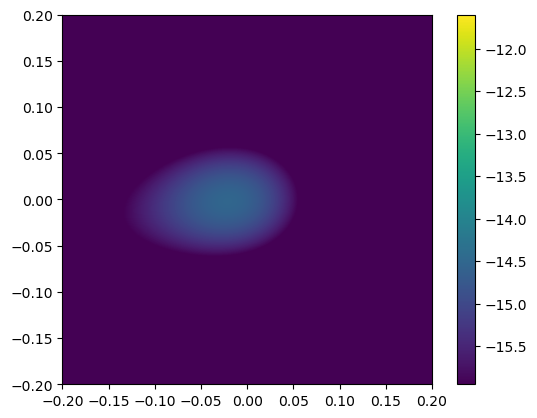

In [5]:
freq = 3000
fwidth = 1
vmin = 80
vmax = 100

pm = bb.synthetic( freq, fwidth )
lm = acoular.L_p( pm )

plt.imshow( lm.T, origin='lower', vmin=lm.max()*vmin/100, vmax=lm.max()*vmax/100, extent=rg.extend(), interpolation='bicubic')
plt.colorbar()

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

plt.figure()
@interact(vmin=widgets.IntSlider(min=50, max=100, step=1, value=80),
          vmax=widgets.IntSlider(min=50, max=100, step=1, value=100),
          freq=widgets.IntSlider(min=100, max=25000, step=100, value=2000),
          fwidth=widgets.IntSlider(min=0, max=8, step=1, value=3) )
def plot(vmin, vmax, freq, fwidth):
    pm = bb.synthetic( freq, fwidth )
    lm = acoular.L_p( pm )

    plt.imshow( lm.T, origin='lower', vmin=lm.max()*vmin/100, vmax=lm.max()*vmax/100, extent=rg.extend(), interpolation='bicubic')
    plt.colorbar()
    

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=80, description='vmin', min=50), IntSlider(value=100, description='vmax'…